<h1 style="text-align:center;">Heart Disease Analysis: Understanding Key Risk Indicators</h1>


### 1: General Information
#### 1.1: Importing Libraries and Loading the Dataset
We start by importing the necessary libraries and loading the dataset.

In [44]:
# Importing required libraries
import pandas as pd
import numpy as np
import warnings

# Load the dataset (update 'heart_disease_uci.csv' with the correct file path)
df = pd.read_csv('heart_disease_uci.csv')

print("Libraries imported, and dataset loaded successfully!")


Libraries imported, and dataset loaded successfully!


#### 1.2: Dataset Dimensions
To understand the size of the dataset, we check the number of rows and columns.

In [45]:
# Check the number of rows and columns
rows, columns = df.shape
print(f"The dataset has {rows} rows and {columns} columns.")


The dataset has 920 rows and 16 columns.


#### 1.3: Preview of the Dataset
Previewing the first few rows helps us get an initial idea of the data.

In [46]:
# Display the first few rows of the dataset
print("Preview of the dataset:")
display(df.head())


Preview of the dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### 1.4: Dataset Structure
The dataset structure provides information about column names, data types, and non-null counts.

In [47]:
# Summary of dataset structure
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### 1.5: Statistical Summary
The statistical summary gives descriptive statistics for numerical columns, such as mean and standard deviation.

In [48]:
# Summary statistics of numerical columns
print("\nStatistical Summary of Numerical Features:")
display(df.describe())



Statistical Summary of Numerical Features:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#### 1.6 Check for Missing Values
To identify missing data, we summarize the count and percentage of missing values for each column.


In [49]:
# Check for missing values
print("\nMissing Values in the Dataset:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage.round(2)})
display(missing_summary)



Missing Values in the Dataset:


,Missing Values,Percentage
id,0,0.00
age,0,0.00
sex,0,0.00
dataset,0,0.00
cp,0,0.00
trestbps,59,6.41
chol,30,3.26
fbs,90,9.78
restecg,2,0.22
thalch,55,5.98


#### 1.7 Categorical Columns Imputation
For categorical columns with missing values, we impute using the mode (most frequent value).

In [50]:

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the option for future downcasting behavior
pd.set_option('future.no_silent_downcasting', True)

# List of all categorical columns with missing values
categorical_columns = ['ca', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Impute missing values in categorical columns with the most frequent value
for column in categorical_columns:
    most_frequent = df[column].mode()[0]  # Get the most frequent value
    df[column] = df[column].fillna(most_frequent)  # Assign filled values back to the column

# Check if missing values are imputed
df.isnull().sum()


id           0
age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs          0
restecg      0
thalch      55
exang        0
oldpeak     62
slope        0
ca           0
thal         0
num          0
dtype: int64

#### 1.8 Numerical Columns Imputation
For numerical columns with missing values, we impute using mean or median based on skewness.

In [51]:
# List of columns with missing values
columns_with_na = df.columns[df.isnull().any()]

# Loop through the columns with missing values
for column in columns_with_na:
    # Calculate skewness
    skewness = df[column].skew()
    
    # Print the skewness and decide on mean/median
    print(f"Skewness of {column}: {skewness}")

    if abs(skewness) > 1:
        print(f"{column} is skewed. Using Median for imputation.")
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    else:
        print(f"{column} is approximately normal. Using Mean for imputation.")
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

# Check the updated dataset
print(df.isnull().sum())


Skewness of trestbps: 0.21333446967212508
trestbps is approximately normal. Using Mean for imputation.
Skewness of chol: -0.6138360897370758
chol is approximately normal. Using Mean for imputation.
Skewness of thalch: -0.21111858073161133
thalch is approximately normal. Using Mean for imputation.
Skewness of oldpeak: 1.0414266146339854
oldpeak is skewed. Using Median for imputation.
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


### 2. Target Variable Analysis
- **Distribution of the target variable**: The target variable (`num`) represents the presence of heart disease with the following categories:
  - 0: No heart disease
  - 1: Mild heart disease
  - 2: Moderate heart disease
  - 3: Severe heart disease
  - 4: Critical heart disease

#### 2.1 Distribution of Heart Disease Severity Levels
This graph shows the count of patients in each severity category of heart disease, ranging from no heart disease to critical heart disease.

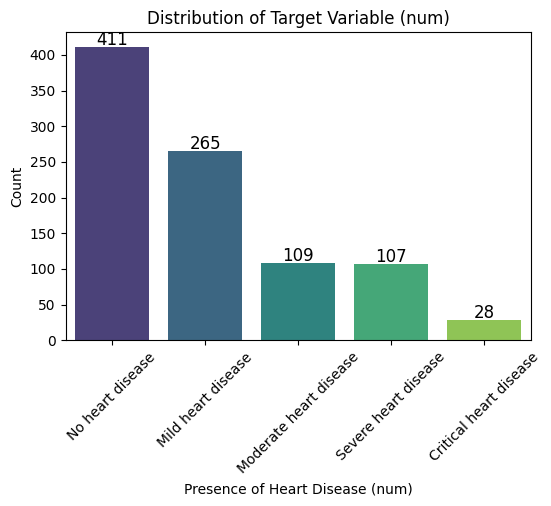

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary for the target variable labels
target_labels = {
    0: 'No heart disease',
    1: 'Mild heart disease',
    2: 'Moderate heart disease',
    3: 'Severe heart disease',
    4: 'Critical heart disease'
}

# Plotting the distribution of the target variable (multiclass) with counts above bars
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='num', palette='viridis')

# Set the title and labels
plt.title("Distribution of Target Variable (num)")
plt.xlabel("Presence of Heart Disease (num)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[target_labels[i] for i in range(5)], rotation=45)

# Adding counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()




- **No heart disease**: There are **411** patients with no heart disease.
- **Mild heart disease**: There are **265** patients with mild heart disease.
- **Moderate heart disease**: There are **109** patients with moderate heart disease.
- **Severe heart disease**: There are **107** patients with severe heart disease.
- **Critical heart disease**: There are **28** patients with critical heart disease.

#### 2.2 Percentage Distribution of Heart Disease Severity

This graph displays the percentage of patients in each severity category of heart disease, illustrating the proportion of individuals in each class.

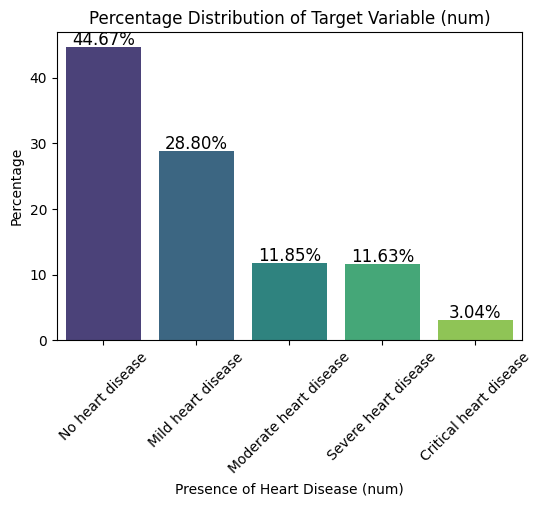

In [53]:
# Calculate percentage distribution
class_percentages = df['num'].value_counts(normalize=True).sort_index() * 100

# Plotting the percentage distribution with percentage above bars
plt.figure(figsize=(6, 4))
ax2 = sns.barplot(x=class_percentages.index, y=class_percentages.values, palette='viridis')

# Set the title and labels
plt.title("Percentage Distribution of Target Variable (num)")
plt.xlabel("Presence of Heart Disease (num)")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[target_labels[i] for i in range(5)], rotation=45)

# Adding percentages above the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

plt.show()



- **No heart disease**: **44.67%** of the patients have no heart disease.
- **Mild heart disease**: **28.80%** of the patients have mild heart disease.
- **Moderate heart disease**: **11.85%** of the patients have moderate heart disease.
- **Severe heart disease**: **11.63%** of the patients have severe heart disease.
- **Critical heart disease**: **3.04%** of the patients have critical heart disease.


### 3. Demographic Insights

#### 3.1 Age Distribution and Range of Patients
This analysis visualizes the distribution of patients' ages and identifies the minimum and maximum ages in the dataset.

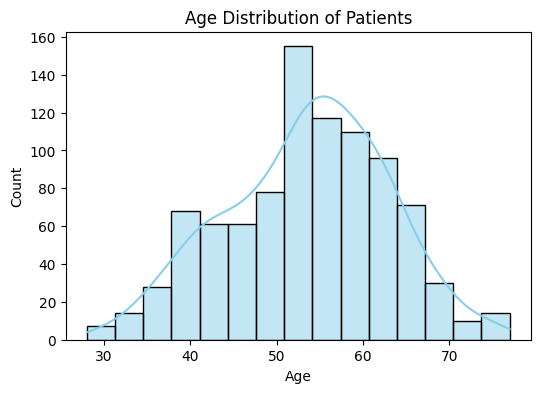

Age range of patients: 28 - 77


In [54]:
# Get the age range
age_min = df['age'].min()
age_max = df['age'].max()

# Plot the distribution of age
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Display the age range
print(f"Age range of patients: {age_min} - {age_max}")



The dataset contains patients ranging in age from **28** years to **77** years.

#### 3.2 Visualizing Gender Distribution of Patients

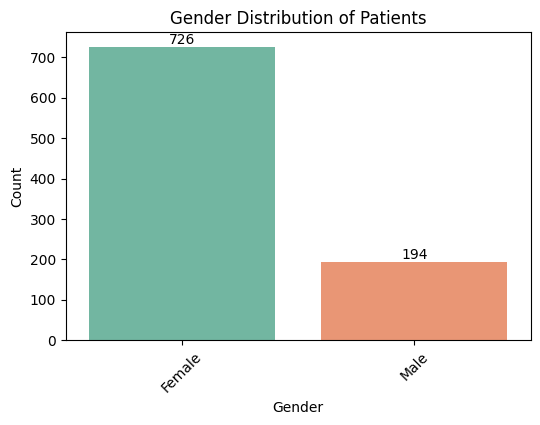

In [55]:
# Gender distribution of patients
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'sex' column exists and has valid values
if 'sex' in df.columns:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x='sex', palette='Set2')
    plt.title("Gender Distribution of Patients")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=["Female", "Male"], rotation=45)

    # Annotate counts on top of bars
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",  # The count value
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
            ha='center', va='bottom', fontsize=10, color='black'
        )
    
    plt.show()



The dataset consists of **726** female patients and **194** male patients, with their counts clearly shown in the graph.

### 4. Health Metrics Analysis
A summary of key health metrics, including average and median values for resting blood pressure, serum cholesterol, and maximum heart rate.

In [56]:
# Calculate the average and median for the specified columns
metrics = {
    'Resting Blood Pressure (trestbps)': {
        'mean': df['trestbps'].mean(),
        'median': df['trestbps'].median()
    },
    'Serum Cholesterol (chol)': {
        'mean': df['chol'].mean(),
        'median': df['chol'].median()
    },
    'Maximum Heart Rate (thalch)': {
        'mean': df['thalch'].mean(),
        'median': df['thalch'].median()
    }
}

# Display the results
for metric, values in metrics.items():
    print(f"\n{metric}:")
    print(f"  Average: {values['mean']:.2f}")
    print(f"  Median: {values['median']:.2f}")



Resting Blood Pressure (trestbps):
  Average: 132.13
  Median: 130.00

Serum Cholesterol (chol):
  Average: 199.13
  Median: 221.00

Maximum Heart Rate (thalch):
  Average: 137.55
  Median: 138.00


**Resting Blood Pressure (trestbps):**

  Average: 132.13
  
  Median: 130.00

**Serum Cholesterol (chol):**

  Average: 199.13
  
  Median: 221.00

**Maximum Heart Rate (thalach):**

  Average: 137.55
  
  Median: 138.00

### 5. Categorical Features Analysis
Analyzing categorical features, including the number of patients with exercise-induced angina and the distribution of different chest pain types.

In [57]:
# Exercise-induced angina (exang) counts
exang_counts = df['exang'].value_counts()

# Chest pain types (cp) counts
cp_counts = df['cp'].value_counts()

# Display the results
print("Exercise-Induced Angina (exang):")
print(f"  No (0): {exang_counts[0] if 0 in exang_counts else 0}")
print(f"  Yes (1): {exang_counts[1] if 1 in exang_counts else 0}\n")

print("Chest Pain Types (cp):")
for cp_type, count in cp_counts.items():
    print(f"  Type {cp_type}: {count}")


Exercise-Induced Angina (exang):
  No (0): 583
  Yes (1): 337

Chest Pain Types (cp):
  Type asymptomatic: 496
  Type non-anginal: 204
  Type atypical angina: 174
  Type typical angina: 46


**Exercise-Induced Angina (exang)**
- **No (0)**: 583
- **Yes (1)**: 337

**Chest Pain Types (cp)**
- **Type Asymptomatic**: 496
- **Type Non-Anginal**: 204
- **Type Atypical Angina**: 174
- **Type Typical Angina**: 46


### 6. Visual Analysis
#### 6.1 Age Distribution of Patients (Density Plot):

The **density plot (KDE)** visualizes the distribution of ages among the patients. It provides a smooth curve that helps us identify the concentration of patients within specific age ranges.

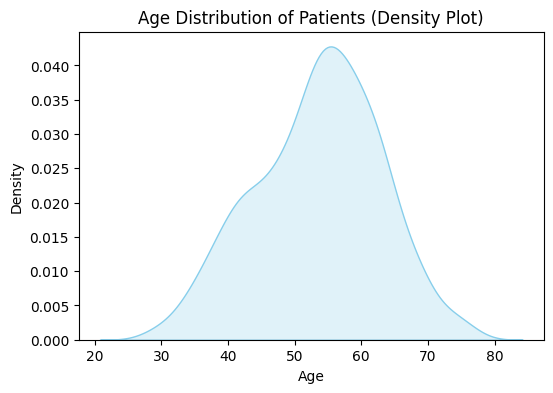

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Age Distribution - Density Plot (KDE)
plt.figure(figsize=(6, 4))
sns.kdeplot(df['age'], shade=True, color='skyblue')
plt.title("Age Distribution of Patients (Density Plot)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

The age range **54-55** has the highest occurrence of heart disease.

#### 6.2 Comparison of Average Cholesterol Levels Between Patients With and Without Heart Disease:
It highlights the differences in cholesterol levels between the two groups, with 'No Heart Disease' and 'Heart Disease' being clearly labeled on the x-axis.

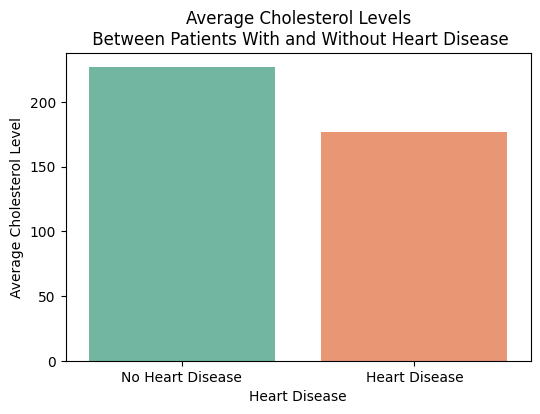

In [59]:
# 2. Comparison of Average Cholesterol Levels Between Patients With and Without Heart Disease
# Creating a new column to indicate the presence of heart disease (0 = No, 1 = Yes)
df['heart_disease'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Plotting the comparison using a bar plot (average cholesterol levels)
plt.figure(figsize=(6, 4))
sns.barplot(x='heart_disease', y='chol', data=df, palette='Set2', ci=None)
plt.title("Average Cholesterol Levels\n Between Patients With and Without Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Average Cholesterol Level")
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], rotation=0)
plt.show()


The **"No heart disease"** group has a **larger range** of cholesterol levels compared to the **"Heart disease"** group.

### 7. Outlier Detection in Cholesterol and Resting Blood Pressure
visualize potential outliers in the chol (cholesterol) and trestbps (resting blood pressure) columns using box plots

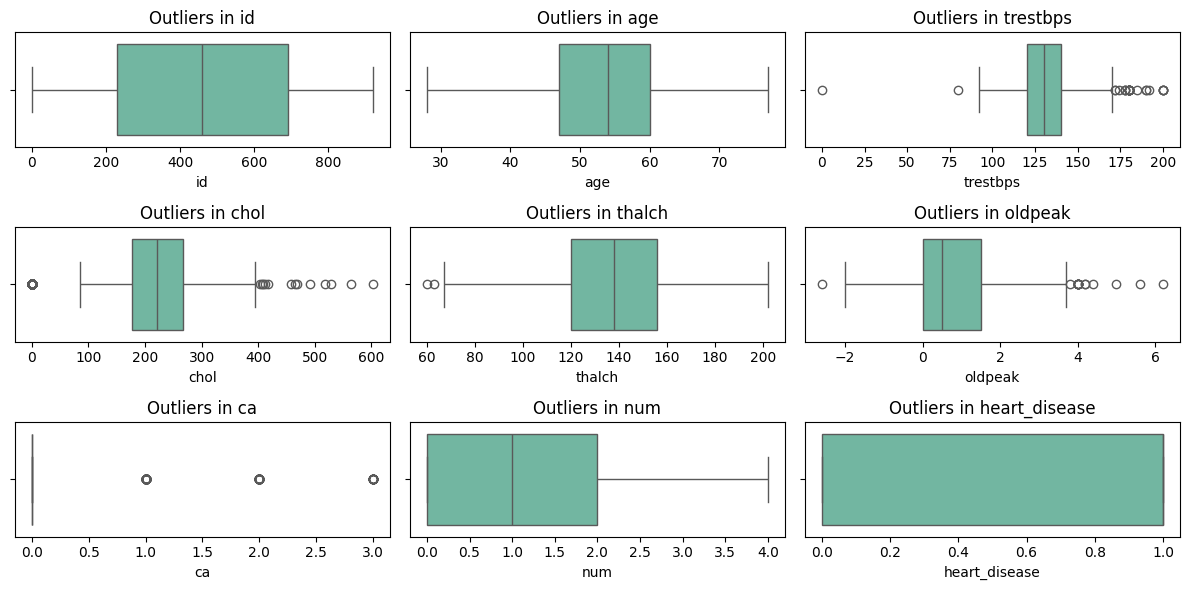

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in the dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for the subplot grid
n_cols = 3  # Define the number of columns you want
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create box plots for each numeric column
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust the number of rows and columns dynamically
    sns.boxplot(data=df, x=column, palette='Set2')
    plt.title(f"Outliers in {column}")
    plt.tight_layout()

plt.show()


The following columns contain outliers based on the box plot analysis:
- **trestbps** (Resting blood pressure)
- **chol** (Serum cholesterol)
- **thalach** (Maximum heart rate)
- **oldpeak** (Depression induced by exercise relative to rest)
- **ca** (Number of major vessels colored by fluoroscopy)

These variables may have extreme values that deviate significantly from the rest of the data. Handling of these outliers can be done by either removing or transforming these values, depending on the goal of the analysis.